##### Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

##### Constantes e valores iniciais

In [10]:
N = 100000 # Tamanho da população
E = 0.9 # Taxa de eficiência da vacina
u = 0.7 # Taxa de vacinação
β = 0.06 # Constante beta / Taxa de infecção
γ = 0.010 # Constante gamma / Taxa de recuperação
μ = 0.005 # Constante mi / Taxa de mortalidade

R0 = 0 # Recuperados iniciais
I0 = 1000 # Infectados iniciais
S0 = N - I0 - R0 # Sucetíveis iniciais

Tmax = 365 # Tempo em dias
Tvac = 60 # Início da campanha de vacinação
Δvac = 30 # Duração da campanha de vacinação

##### Algorítimo

In [11]:
S = [S0]
I = [I0]
R = [R0]
D = [0]
V = [0]

for t in range(Tmax):
       
    St = S[-1]
    It = I[-1]
    Rt = R[-1]
    Dt = D[-1]
    Vt = V[-1]

    if (t < Tvac or t > Tvac + Δvac):
        dS = -(β * It * St / N)
        dV = 0

    else:
        dS = -(β * It * St / N) - (u * St * E / Δvac)
        dV = u * St * E / Δvac

    dI = (β * It * St / N) - (γ * It) - (μ * It)
    dR = γ * It
    dD = μ * It

    St1 = St + dS
    It1 = It + dI
    Rt1 = Rt + dR
    Ft1 = Dt + dD
    Vt1 = Vt + dV


    S.append(St1)
    I.append(It1)
    R.append(Rt1)
    D.append(Ft1)
    V.append(Vt1)


##### Configuração do matplotlib

In [4]:
def plot_config():
    plt.style.use('dark_background')

    fig, ax = plt.subplots()

    red_line = mlines.Line2D([], [], color='red', label='Infectados')
    blue_line = mlines.Line2D([], [], color='blue', label='Recuperados')
    green_line = mlines.Line2D([], [], color='green', label='Sucetíveis')
    cyan_line = mlines.Line2D([], [], color='cyan', linestyle='--', label='Vacinados')
    white_line = mlines.Line2D([], [], color='white', linestyle='--', label='Óbitos')
    ax.legend(handles=[green_line, blue_line, red_line, cyan_line, white_line])

    font1 = {'family':'arial', 'size':11}
    plt.xlabel("Dias", fontdict = font1)
    plt.ylabel("População", fontdict = font1)
    ax.set_title('Impacto da vacina')

##### Plotagem

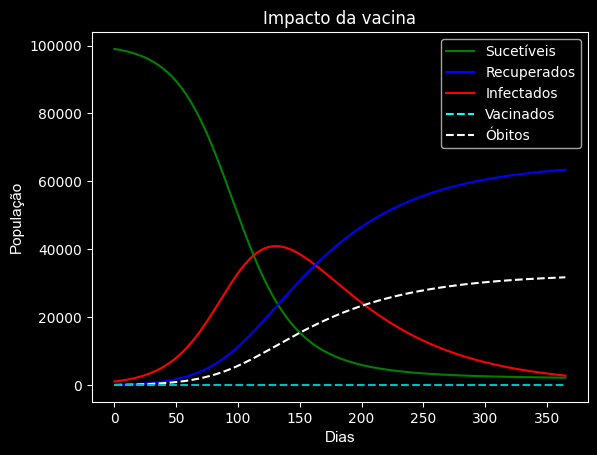

In [5]:
# Sem vacinação
plot_config()

plt.plot(S, 'g')
plt.plot(I, 'r')
plt.plot(R, 'b')
plt.plot(D, 'w--')
plt.plot(V, 'c--')

plt.show()


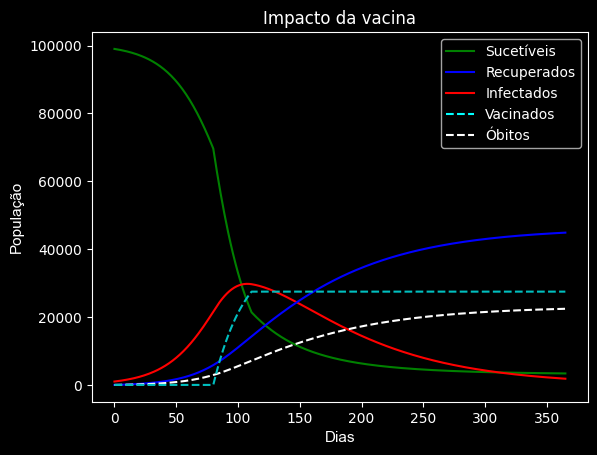

In [9]:
# Vacinação com Tvac = 80
plot_config()

plt.plot(S, 'g')
plt.plot(I, 'r')
plt.plot(R, 'b')
plt.plot(D, 'w--')
plt.plot(V, 'c--')

plt.show()

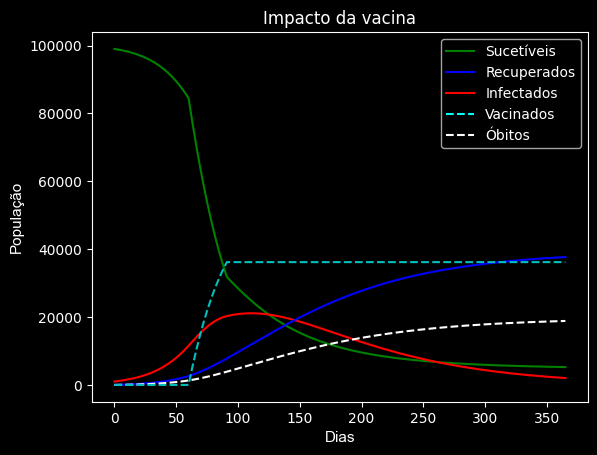

In [12]:
# Vacinação com Tvac = 60
plot_config()

plt.plot(S, 'g')
plt.plot(I, 'r')
plt.plot(R, 'b')
plt.plot(D, 'w--')
plt.plot(V, 'c--')

plt.show()